# Image Recognition using python


import required libraries before start

In [11]:
import requests
import os
import time
import matplotlib.pyplot as plt

Some predefined values used for access files from github or used inside methods

In [12]:
# Github Repository Information
repoOwner = 'yanglinfang'
repoName = 'npo_tech_wildlife_camera'
folderPath = 'dataset'

# GitHub API endpoint to list contents of the folder
apiUrl = f'https://api.github.com/repos/{repoOwner}/{repoName}/contents/{folderPath}'

# Retry times when failed to download image
maxRetry = 10

# Dictionary to store image count inside each folder
folderCounts = {}

Define method to load images from different folders

In [13]:
def load_image_from_folder(apiUrl, maxRetry = 10):
    # Send HTTP GET request
    response = requests.get(apiUrl)

    #Check if request was successful(status code 200)
    if response.status_code == 200:

        # Turn the folder into a file 
        folderContents = response.json()

        # Loop through contents of folder
        for item in folderContents:
            if item['type'] == 'dir':
                subFolderUrl = item['url']
                load_image_from_folder(subFolderUrl, maxRetry)
            elif item['type'] == 'file':
                # store directory path into dictionary, count how many images under same directory name
                folderName = os.path.dirname(item['path'])
                folderCounts[folderName] = folderCounts.get(folderName, 0) + 1
                
                # fileName = item['name']
                # downloadUrl = item['download_url']

                # for retry in range(maxRetry):
                #     try:
                #         # Send an HTTP GET request to download the image
                #         imageResponse = requests.get(downloadUrl, timeout=10)

                #         if imageResponse.status_code == 200:
                #             # readImage = imageResponse.content
                #             print(f'Load image {fileName} successfull')
                #             break

                #     except requests.exceptions.RequestException as e:
                #         time.sleep(1)
                # else:
                #     print(f'Failed to downloadimage {fileName} after {maxRetry} retries')
    else:
        print(f'Failed to fetch folder: Status Code {response.status_code}')

Define image analysing method (not yet finished)

Excecute load image to gather data from github repository

In [14]:
load_image_from_folder(apiUrl, maxRetry)

{'dataset/test_set/Human': 43, 'dataset/test_set/domestic': 150, 'dataset/test_set/wild': 160, 'dataset/train_set/Human': 251, 'dataset/train_set/domestic': 349, 'dataset/train_set/wild': 393}


Now combine the data into a bar chart

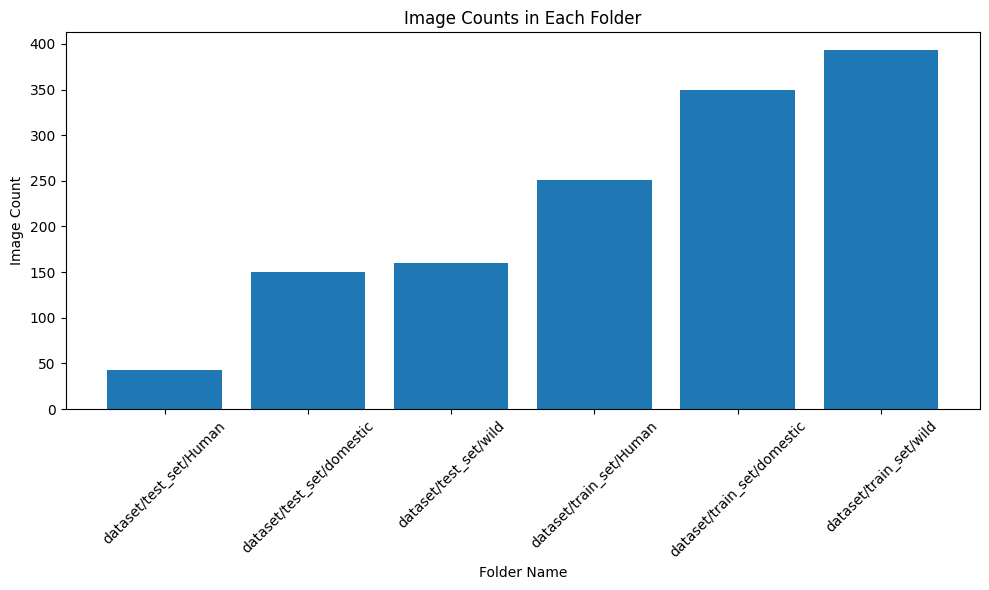

In [15]:
folderName = list(folderCounts.keys())
imageCount = list(folderCounts.values())

plt.figure(figsize=(10, 6))
plt.bar(folderName, imageCount)
plt.xlabel('Folder Name')
plt.ylabel('Image Count')
plt.title('Image Counts in Each Folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()